In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df = pd.read_csv('../Datasets/titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


### EDA : Information, Filling null values, Plotting Features, Dropping Columns

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [152]:
print(df.columns)

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')


In [153]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])

In [154]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [155]:
df.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

In [156]:
df['Age'].median()

28.0

In [157]:
df['Age'].mean()

29.69911764705882

In [158]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/var/folders/dq/qk8zdkks74s233j5sqv_tsb40000gn/T/ipykernel_64149/1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [159]:
df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [160]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [161]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0


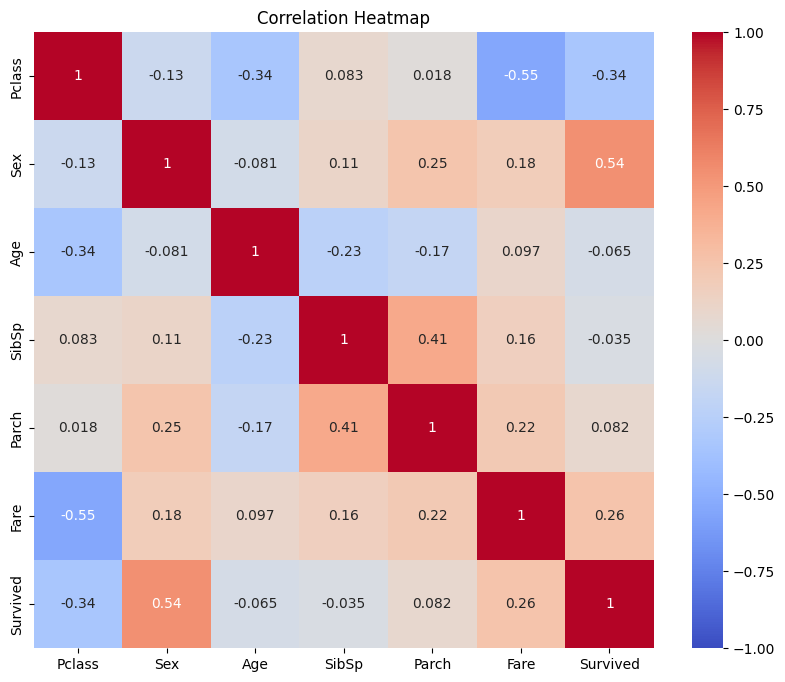

In [162]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

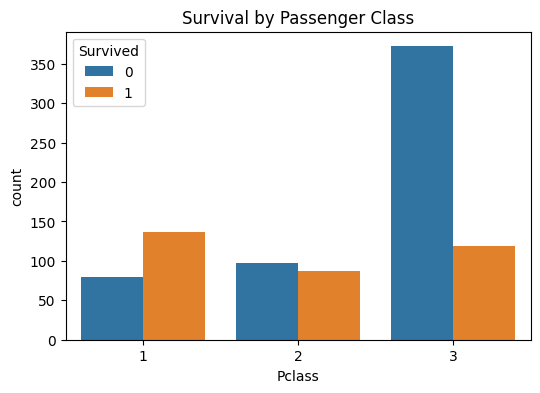

In [163]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

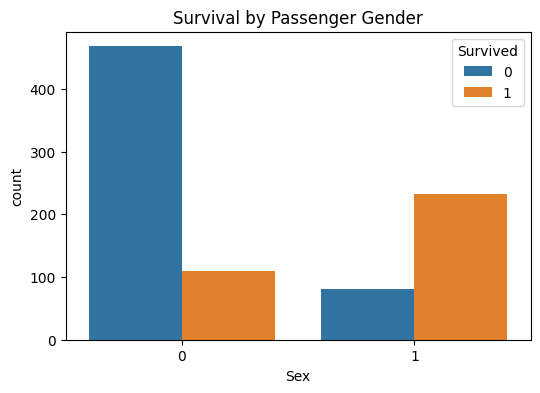

In [164]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Passenger Gender')
plt.show()

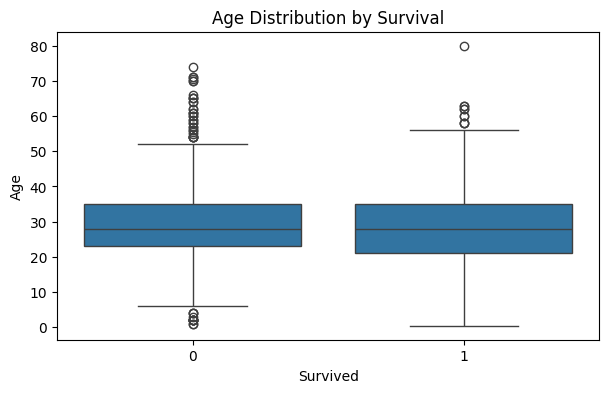

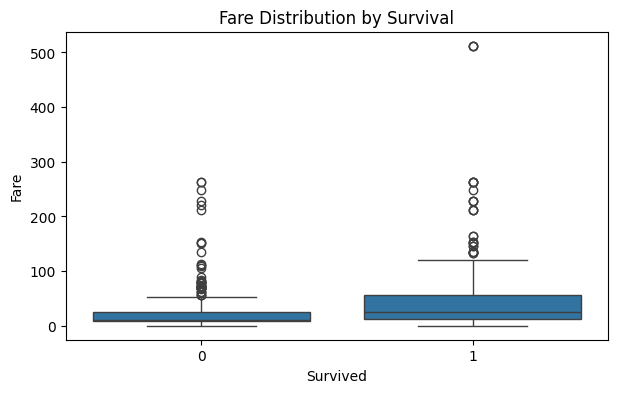

In [165]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

plt.figure(figsize=(7, 4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

In [166]:
# Significant columns are: Pclass, Sex, Age, Fare
df = df.drop(columns=['SibSp', 'Parch'])

In [167]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,3,0,35.0,8.0500,0


### Separating Dependent and Independent Features

In [168]:
target = df['Survived']
inputs = df.drop(columns=['Survived'])

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [170]:
print(len(X_train), len(X_test), len(inputs))

712 179 891


In [171]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [172]:
classifier.score(X_test, y_test)

0.8100558659217877

In [173]:
y_pred = classifier.predict(X_test)

In [178]:
y_test = y_test.values.reshape(len(y_test), 1)
y_pred = y_pred.reshape(len(y_pred), 1)

compare = np.concatenate((y_test, y_pred), axis=1)
print(compare)

[[0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]

In [182]:
prob = classifier.predict_proba(X_test)
prob_percent = prob * 100
print(np.round(prob_percent, 2))

[[ 94.05   5.95]
 [ 43.34  56.66]
 [ 42.29  57.71]
 [ 42.52  57.48]
 [ 69.93  30.07]
 [ 96.15   3.85]
 [ 45.29  54.71]
 [ 95.79   4.21]
 [ 73.05  26.95]
 [ 95.78   4.22]
 [ 95.38   4.62]
 [ 23.05  76.95]
 [ 92.27   7.73]
 [ 41.23  58.77]
 [ 37.85  62.15]
 [ 96.33   3.67]
 [ 95.67   4.33]
 [ 41.    59.  ]
 [ 96.19   3.81]
 [ 30.18  69.82]
 [ 24.33  75.67]
 [ 38.37  61.63]
 [ 44.19  55.81]
 [ 89.31  10.69]
 [ 96.     4.  ]
 [ 69.22  30.78]
 [ 91.69   8.31]
 [ 95.73   4.27]
 [ 96.1    3.9 ]
 [ 96.46   3.54]
 [ 36.78  63.22]
 [  0.81  99.19]
 [ 41.83  58.17]
 [ 24.29  75.71]
 [ 96.59   3.41]
 [ 96.14   3.86]
 [ 96.37   3.63]
 [  3.31  96.69]
 [ 96.42   3.58]
 [ 93.61   6.39]
 [  0.   100.  ]
 [ 92.66   7.34]
 [ 28.82  71.18]
 [ 73.31  26.69]
 [ 39.83  60.17]
 [ 96.19   3.81]
 [ 95.72   4.28]
 [  5.27  94.73]
 [ 39.21  60.79]
 [ 92.19   7.81]
 [ 91.02   8.98]
 [ 96.31   3.69]
 [ 93.23   6.77]
 [  0.   100.  ]
 [ 94.27   5.73]
 [ 96.05   3.95]
 [ 90.4    9.6 ]
 [ 92.14   7.86]
 [ 91.49   8.5